In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\91875\\Documents\\Project\\Weapon.csv")
data.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

In [6]:
data.shape

(44, 20)

In [7]:
data.isnull().sum()

Weapon Name              0
Weapon Type              0
Bullet Type              6
Damage                   0
Magazine Capacity        0
Range                    6
Bullet Speed             8
Rate of Fire             0
Shots to Kill (Chest)    0
Shots to Kill (Head)     0
Damage Per Second        0
Fire Mode                0
BDMG_0                   7
BDMG_1                   7
BDMG_2                   7
BDMG_3                   7
HDMG_0                   7
HDMG_1                   7
HDMG_2                   7
HDMG_3                   7
dtype: int64

DROPPING NULL VALUES

In [8]:
data.dropna(inplace = True)

In [9]:
data.shape

(35, 20)

Unique Items in column

In [10]:
data.nunique().reset_index()

,index,0
0,Weapon Name,35
1,Weapon Type,7
2,Bullet Type,6
3,Damage,25
4,Magazine Capacity,13
5,Range,10
6,Bullet Speed,22
7,Rate of Fire,23
8,Shots to Kill (Chest),7
9,Shots to Kill (Head),4


In [11]:
data.describe()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000
mean,6.713143,61.885714,22.200000,435.000000,621.942857,0.268614,3.742857,2.142857,449.671714,65.857143,46.397143,39.717143,29.782857,123.00000,86.085714,73.760000,55.314286
std,3.160002,48.552441,18.665476,289.218013,257.478262,0.514692,1.521278,0.772424,207.026656,56.846927,39.718758,33.911645,25.478139,65.46816,45.857555,39.292592,29.432986
min,0.300000,23.000000,2.000000,25.000000,250.000000,0.010000,1.000000,1.000000,39.000000,22.400000,15.700000,13.400000,10.100000,44.90000,31.400000,26.900000,20.200000
25%,5.560000,41.000000,8.500000,200.000000,350.000000,0.051500,3.000000,2.000000,395.500000,40.800000,29.250000,25.050000,18.750000,88.75000,62.100000,53.250000,39.900000
50%,7.620000,46.000000,20.000000,500.000000,715.000000,0.086000,4.000000,2.000000,479.000000,46.000000,32.900000,28.200000,21.100000,108.10000,75.600000,64.800000,48.600000
75%,9.000000,55.500000,30.000000,600.000000,866.500000,0.125000,4.500000,2.500000,536.000000,58.250000,40.750000,34.900000,26.200000,130.40000,91.250000,78.200000,58.650000
max,12.000000,216.000000,100.000000,900.000000,990.000000,1.900000,8.000000,4.000000,1080.000000,282.600000,198.000000,169.200000,126.900000,312.30000,218.700000,187.200000,140.400000


In [12]:
data.duplicated().sum()

0

In [13]:
data.corr()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
Bullet Type,1.000000,0.405011,-0.116475,-0.323582,-0.222757,-0.124119,-0.135774,-0.141653,0.390958,0.369985,0.370296,0.369658,0.370035,0.201590,0.201742,0.201276,0.201279
Damage,0.405011,1.000000,-0.392573,-0.227800,-0.153856,0.322225,-0.742257,-0.663811,0.233957,0.965801,0.966128,0.965837,0.966203,0.879480,0.879297,0.879142,0.878896
Magazine Capacity,-0.116475,-0.392573,1.000000,-0.008145,0.199632,-0.366683,0.389252,0.254998,0.213820,-0.408612,-0.406762,-0.406335,-0.406960,-0.429984,-0.429690,-0.429739,-0.430351
Range,-0.323582,-0.227800,-0.008145,1.000000,0.835816,0.314057,-0.341592,-0.421299,-0.237103,-0.182339,-0.180874,-0.179638,-0.179979,0.141101,0.140946,0.141277,0.142178
Bullet Speed,-0.222757,-0.153856,0.199632,0.835816,1.000000,0.155546,-0.294385,-0.459881,-0.077844,-0.137121,-0.131810,-0.130889,-0.131246,0.151610,0.151666,0.151771,0.152416
Rate of Fire,-0.124119,0.322225,-0.366683,0.314057,0.155546,1.000000,-0.468227,-0.532925,-0.664710,0.377847,0.375403,0.376513,0.376618,0.594253,0.594085,0.594167,0.595516
Shots to Kill (Chest),-0.135774,-0.742257,0.389252,-0.341592,-0.294385,-0.468227,1.000000,0.933253,-0.000369,-0.745016,-0.745635,-0.746138,-0.746048,-0.853307,-0.852995,-0.853033,-0.853582
Shots to Kill (Head),-0.141653,-0.663811,0.254998,-0.421299,-0.459881,-0.532925,0.933253,1.000000,0.052904,-0.670012,-0.673069,-0.673798,-0.673595,-0.828917,-0.828783,-0.828651,-0.829479
Damage Per Second,0.390958,0.233957,0.213820,-0.237103,-0.077844,-0.664710,-0.000369,0.052904,1.000000,0.194516,0.197971,0.196503,0.197327,-0.028221,-0.028358,-0.029058,-0.028883
BDMG_0,0.369985,0.965801,-0.408612,-0.182339,-0.137121,0.377847,-0.745016,-0.670012,0.194516,1.000000,0.999897,0.999896,0.999904,0.826371,0.825847,0.825671,0.826058


VISUALIZATION

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assault Rifle'),
  Text(1, 0, 'Light Machine Gun'),
  Text(2, 0, 'Submachine Gun'),
  Text(3, 0, 'Shotgun'),
  Text(4, 0, 'Designed Marksman Rifle'),
  Text(5, 0, 'Sniper Rifle'),
  Text(6, 0, 'Pistol')])

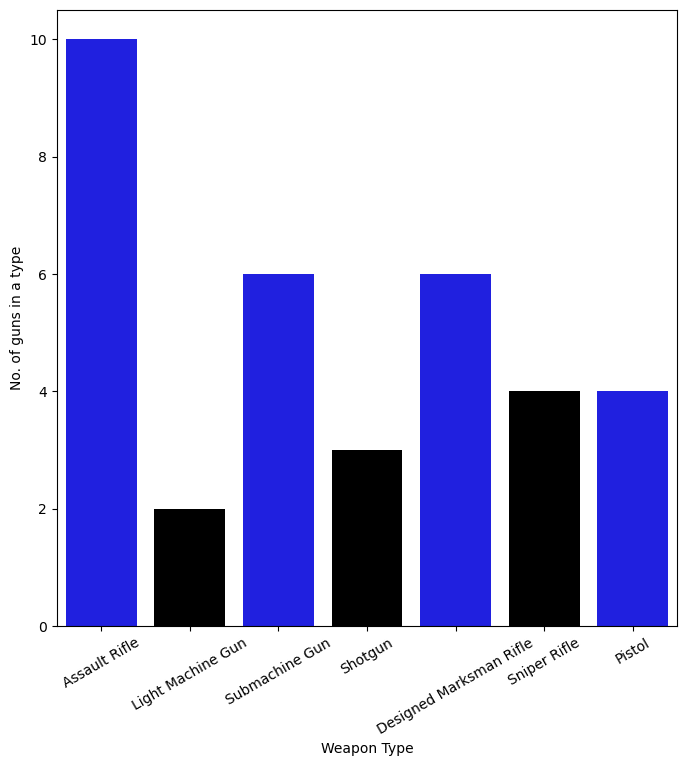

In [47]:
plt.figure(figsize=(8,8))
sns.countplot(x = data["Weapon Type"],palette=["blue","black"])
plt.ylabel("No. of guns in a type")
plt.xticks(rotation=30)

WEAPONS UNDER EACH TYPE

AR

In [16]:
data.loc[data["Weapon Type"]=="Assault Rifle","Weapon Name"]

0          Groza
1            AKM
2           M762
3    MK47 Mutant
4         AUG A3
5         SCAR-L
6           M416
7          M16A4
8           G36C
9            OBZ
Name: Weapon Name, dtype: object

LMG

In [18]:
data.loc[data["Weapon Type"] == "Light Machine Gun","Weapon Name"]

10     M249
11    DP-28
Name: Weapon Name, dtype: object

SMG


In [19]:
data.loc[data["Weapon Type"] == "Submachine Gun","Weapon Name"]

12      Vector
13         Uzi
14    PP-Bizon
15        MP5K
16    Thompson
17       UMP45
Name: Weapon Name, dtype: object

SNIPERS

In [20]:
data.loc[data["Weapon Type"] == "Sniper Rifle","Weapon Name"]

27      AWM
28      M24
29    Kar98
30    Win94
Name: Weapon Name, dtype: object

SHOTGUNS

In [21]:
data.loc[data["Weapon Type"] == "Shotgun","Weapon Name"]

18     S686
19    S1897
20     S12K
Name: Weapon Name, dtype: object

DAMAGE UNDER EACH WEAPON

In [24]:
dmg=data.groupby("Weapon Type").mean()["Damage"]
dmg.reset_index().sort_values(by="Damage",ascending=False)

,Weapon Type,Damage
4,Shotgun,210.000000
5,Sniper Rifle,81.250000
1,Designed Marksman Rifle,50.833333
2,Light Machine Gun,48.000000
0,Assault Rifle,45.200000
3,Pistol,38.500000
6,Submachine Gun,34.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assault Rifle'),
  Text(1, 0, 'Designed Marksman Rifle'),
  Text(2, 0, 'Light Machine Gun'),
  Text(3, 0, 'Pistol'),
  Text(4, 0, 'Shotgun'),
  Text(5, 0, 'Sniper Rifle'),
  Text(6, 0, 'Submachine Gun')])

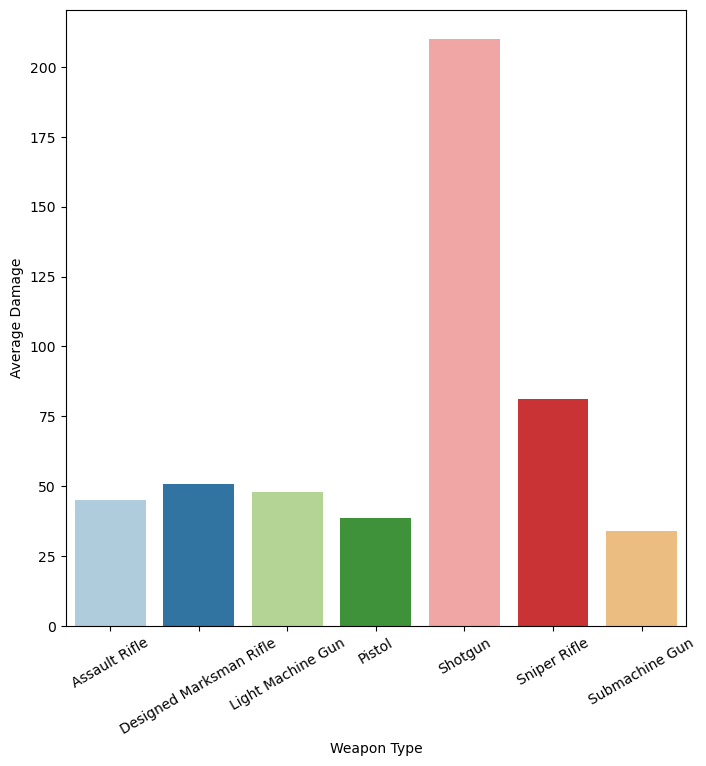

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(x=dmg.index,y=dmg.values,palette='Paired')
plt.ylabel("Average Damage")
plt.xticks(rotation=30)

RANGE UNDER EACH WEAPON

In [27]:
range=data.groupby(["Weapon Type"]).mean()["Range"]
range.reset_index().sort_values(by="Range",ascending=False)

,Weapon Type,Range
5,Sniper Rifle,775.000000
1,Designed Marksman Rifle,733.333333
0,Assault Rifle,530.000000
2,Light Machine Gun,500.000000
6,Submachine Gun,208.333333
3,Pistol,25.000000
4,Shotgun,25.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assault Rifle'),
  Text(1, 0, 'Designed Marksman Rifle'),
  Text(2, 0, 'Light Machine Gun'),
  Text(3, 0, 'Pistol'),
  Text(4, 0, 'Shotgun'),
  Text(5, 0, 'Sniper Rifle'),
  Text(6, 0, 'Submachine Gun')])

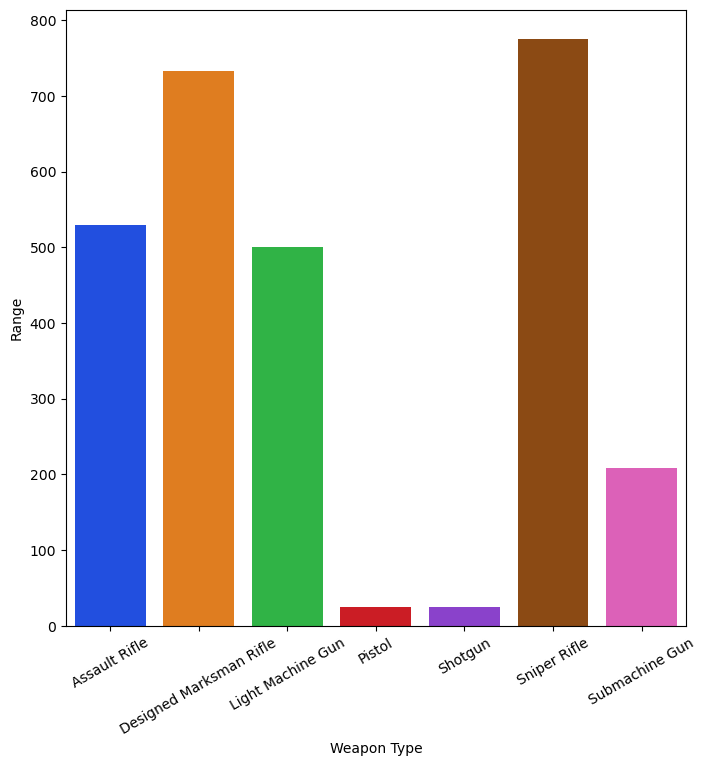

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x=range.index,y=range.values,palette='bright')
plt.ylabel("Range")
plt.xticks(rotation=30)

AVERAGE DAMAGE VEST AND HELMET VS WEAPON TYPE

[Text(0, 0, 'Assault Rifle'),
 Text(1, 0, 'Designed Marksman Rifle'),
 Text(2, 0, 'Light Machine Gun'),
 Text(3, 0, 'Pistol'),
 Text(4, 0, 'Shotgun'),
 Text(5, 0, 'Sniper Rifle'),
 Text(6, 0, 'Submachine Gun')]

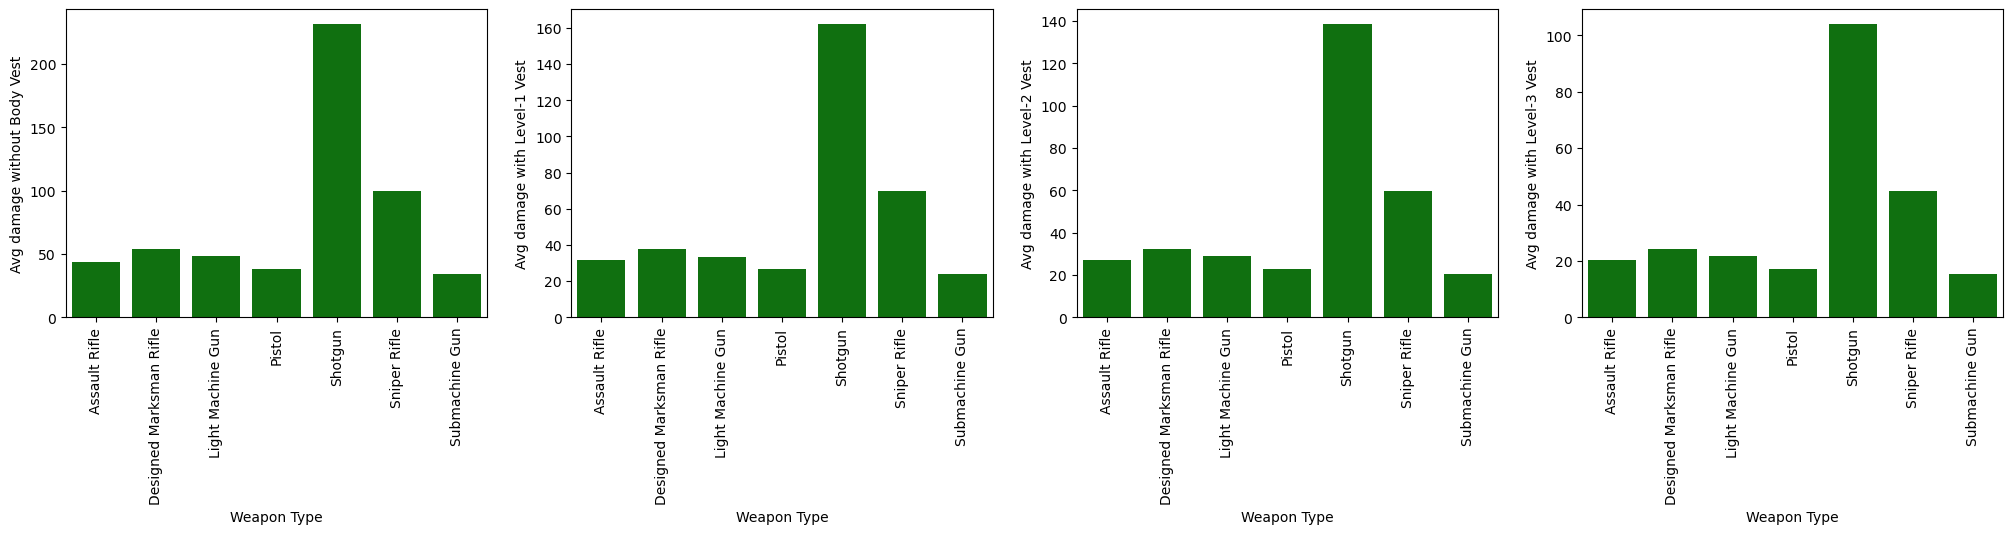

In [35]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,4))
dmg0=data.groupby("Weapon Type").mean()["BDMG_0"]
sns.barplot(x=dmg0.index,y=dmg0.values,ax=ax1,palette=["green"])
ax1.set_xlabel("Weapon Type")
ax1.set_ylabel("Avg damage without Body Vest")
ax1.set_xticklabels(labels=dmg0.index,rotation=90)

dmg1=data.groupby("Weapon Type").mean()["BDMG_1"]
sns.barplot(x=dmg1.index,y=dmg1.values,ax=ax2,palette=["green"])
ax2.set_xlabel("Weapon Type")
ax2.set_ylabel("Avg damage with Level-1 Vest")
ax2.set_xticklabels(labels=dmg1.index,rotation=90)

dmg2=data.groupby("Weapon Type").mean()["BDMG_2"]
sns.barplot(x=dmg2.index,y=dmg2.values,ax=ax3,palette=["green"])
ax3.set_xlabel("Weapon Type")
ax3.set_ylabel("Avg damage with Level-2 Vest")
ax3.set_xticklabels(labels=dmg2.index,rotation=90)

dmg3=data.groupby("Weapon Type").mean()["BDMG_3"]
sns.barplot(x=dmg3.index,y=dmg3.values,ax=ax4,palette=["green"])
ax4.set_xlabel("Weapon Type")
ax4.set_ylabel("Avg damage with Level-3 Vest")
ax4.set_xticklabels(labels=dmg3.index,rotation=90)

[Text(0, 0, 'Assault Rifle'),
 Text(1, 0, 'Designed Marksman Rifle'),
 Text(2, 0, 'Light Machine Gun'),
 Text(3, 0, 'Pistol'),
 Text(4, 0, 'Shotgun'),
 Text(5, 0, 'Sniper Rifle'),
 Text(6, 0, 'Submachine Gun')]

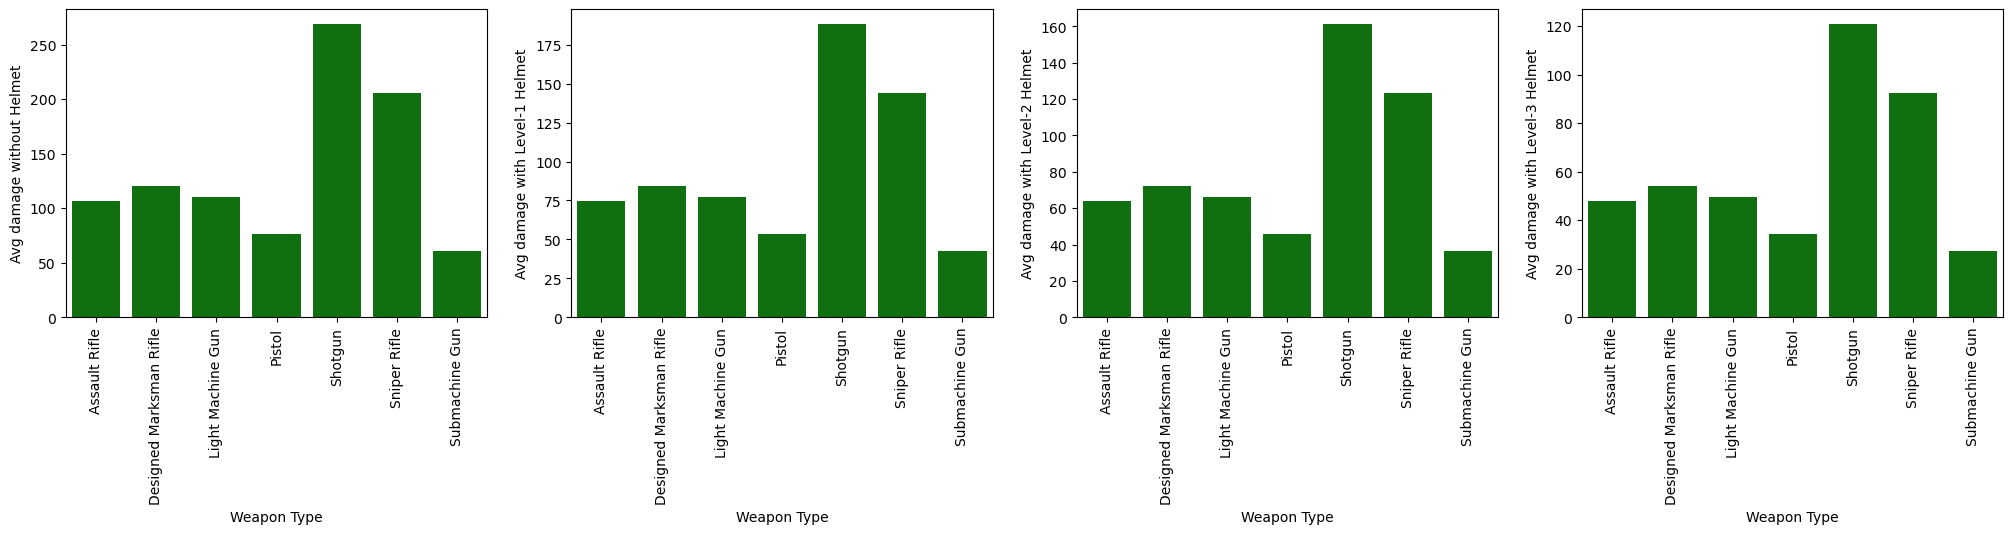

In [37]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,4))
dmg0=data.groupby("Weapon Type").mean()["HDMG_0"]
sns.barplot(x=dmg0.index,y=dmg0.values,ax=ax1,palette=["green"])
ax1.set_xlabel("Weapon Type")
ax1.set_ylabel("Avg damage without Helmet")
ax1.set_xticklabels(labels=dmg0.index,rotation=90)

dmg1=data.groupby("Weapon Type").mean()["HDMG_1"]
sns.barplot(x=dmg1.index,y=dmg1.values,ax=ax2,palette=["green"])
ax2.set_xlabel("Weapon Type")
ax2.set_ylabel("Avg damage with Level-1 Helmet")
ax2.set_xticklabels(labels=dmg1.index,rotation=90)

dmg2=data.groupby("Weapon Type").mean()["HDMG_2"]
sns.barplot(x=dmg2.index,y=dmg2.values,ax=ax3,palette=["green"])
ax3.set_xlabel("Weapon Type")
ax3.set_ylabel("Avg damage with Level-2 Helmet")
ax3.set_xticklabels(labels=dmg2.index,rotation=90)

dmg3=data.groupby("Weapon Type").mean()["HDMG_3"]
sns.barplot(x=dmg3.index,y=dmg3.values,ax=ax4,palette=["green"])
ax4.set_xlabel("Weapon Type")
ax4.set_ylabel("Avg damage with Level-3 Helmet")
ax4.set_xticklabels(labels=dmg3.index,rotation=90)

From this we can infer that the shotguns are suitable for close range fights.

AWM or sniper rifles are suitable for long range fights.

AR guns are suitable for average range fights.